<a href="https://colab.research.google.com/github/devansh391k/COVID-19-ANALYSIS-DEEP-LEARNING-PROJECT/blob/main/COVID19_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COVID 19 ANALYSIS PROJECT**
# TEAM MEMBERS
# **DEVANSH SHUKLA 22BDS0064**
# **HARSH KASHYAP 22BDS0086**
# **HARSH KUMAR 22BDS0104**

# **GITHUB LINK**

[COVID 19 ANALYSIS 1](https://github.com/devansh391k/COVID-19-ANALYSIS-DATA-SCIENCE-PROJECT-/blob/main/COVID19_ANALYSIS.ipynb)


# **LOADING DATASET AND ANALYSIS**

In [2]:
import pandas as pd
import numpy as np

# Load and parse dates
df = pd.read_csv("DATA COVID 19.csv", parse_dates=['date'])

# Drop columns with >95% missing
missing_percent = df.isnull().mean()
df_cleaned = df.drop(columns=missing_percent[missing_percent > 0.95].index)

# Fill missing numeric values with forward fill
df_cleaned = df_cleaned.fillna(method='ffill')

# Drop rows with remaining NaNs
df_cleaned = df_cleaned.dropna()

# Reset index
df_cleaned.reset_index(drop=True, inplace=True)

df_cleaned.info()


/tmp/ipython-input-3876239837.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned = df_cleaned.fillna(method='ffill')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490094 entries, 0 to 490093
Data columns (total 52 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   country                                     490094 non-null  object        
 1   date                                        490094 non-null  datetime64[ns]
 2   total_cases                                 490094 non-null  float64       
 3   new_cases                                   490094 non-null  float64       
 4   new_cases_smoothed                          490094 non-null  float64       
 5   total_cases_per_million                     490094 non-null  float64       
 6   new_cases_per_million                       490094 non-null  float64       
 7   new_cases_smoothed_per_million              490094 non-null  float64       
 8   total_deaths                                490094 non-null  float64      

In [3]:
import matplotlib.pyplot as plt

# Univariate statistics for 'total_cases'
univariate_stats = df_cleaned['total_cases'].describe()
skewness = df_cleaned['total_cases'].skew()
kurtosis = df_cleaned['total_cases'].kurt()

# Print stats in console (optional)
print("Univariate Statistics for 'total_cases':")
print(univariate_stats)
print(f"\nSkewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")


Univariate Statistics for 'total_cases':
count    4.900940e+05
mean     1.306547e+07
std      7.223130e+07
min      0.000000e+00
25%      9.518000e+03
50%      8.862700e+04
75%      1.047489e+06
max      7.783446e+08
Name: total_cases, dtype: float64

Skewness: 7.79
Kurtosis: 64.70


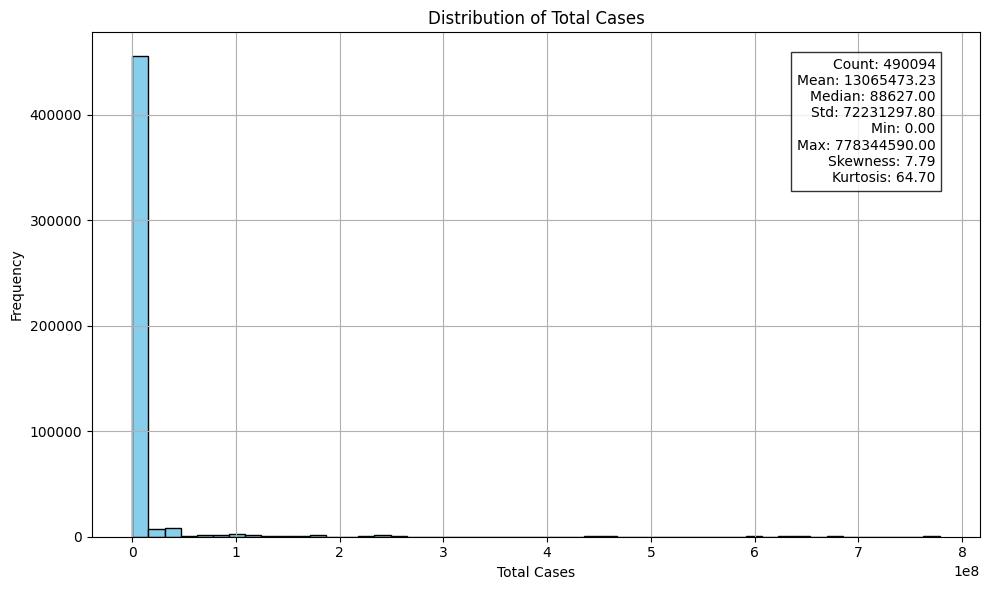

In [4]:
# Plot Histogram with text box showing stats
plt.figure(figsize=(10, 6))
df_cleaned['total_cases'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Frequency')

# Stats box text
stats_text = (
    f"Count: {univariate_stats['count']:.0f}\n"
    f"Mean: {univariate_stats['mean']:.2f}\n"
    f"Median: {df_cleaned['total_cases'].median():.2f}\n"
    f"Std: {univariate_stats['std']:.2f}\n"
    f"Min: {univariate_stats['min']:.2f}\n"
    f"Max: {univariate_stats['max']:.2f}\n"
    f"Skewness: {skewness:.2f}\n"
    f"Kurtosis: {kurtosis:.2f}"
)

# Place stats on the plot
plt.gca().text(
    0.95, 0.95, stats_text,
    transform=plt.gca().transAxes,
    fontsize=10, verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(facecolor='white', alpha=0.8)
)

plt.tight_layout()
plt.show()

#**BIVARIATE ANALYSIS**


# **Scatter Plot: Total Cases vs Total Deaths with Correlation**

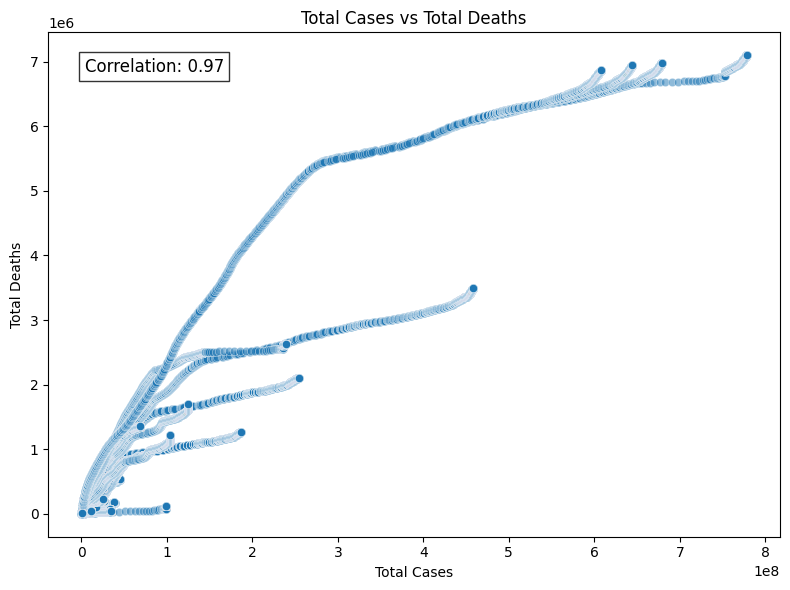

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation
corr = df_cleaned['total_cases'].corr(df_cleaned['total_deaths'])

# Scatter plot with correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='total_cases', y='total_deaths', alpha=0.5)
plt.title('Total Cases vs Total Deaths')

# Add correlation value as text
plt.gca().text(
    0.05, 0.95,
    f"Correlation: {corr:.2f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(facecolor='white', alpha=0.8)
)

plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.show()


# **Box Plot: New Cases by Continent with Summary Stats**

Summary of 'new_cases' by Continent:
                  count          mean            std  min  25%  50%    75%  \
continent                                                                    
Africa         125784.0  25696.989132  198039.414990  0.0  0.0  0.0   28.0   
Asia            98422.0   3063.489840   62741.173544  0.0  0.0  0.0  221.0   
Europe         107729.0   3242.916262   29348.241225  0.0  0.0  0.0  210.0   
North America   82983.0   9899.834050  112868.590607  0.0  0.0  0.0   13.0   
Oceania         48673.0   2866.728371   28686.068516  0.0  0.0  0.0    0.0   
South America   26503.0   2226.264008   10032.911275  0.0  0.0  0.0  419.0   

                     max  
continent                 
Africa         8401906.0  
Asia           6966046.0  
Europe         2417043.0  
North America  7197333.0  
Oceania        1410856.0  
South America   298408.0  


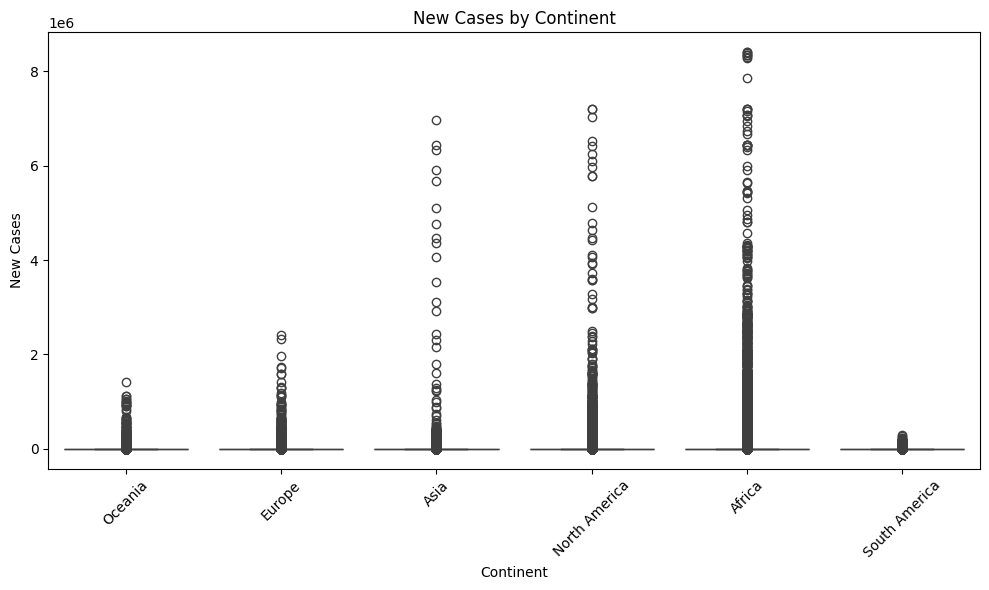

In [6]:
# Calculate group-wise stats
continent_stats = df_cleaned.groupby('continent')['new_cases'].describe()

# Display boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='continent', y='new_cases')
plt.xticks(rotation=45)
plt.title('New Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('New Cases')

# Optional: print the group-wise summary to console
print("Summary of 'new_cases' by Continent:")
print(continent_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']])

plt.tight_layout()
plt.show()


#**MULTIVARIATE ANALYSIS**

# **Multivariate Correlation Heatmap**

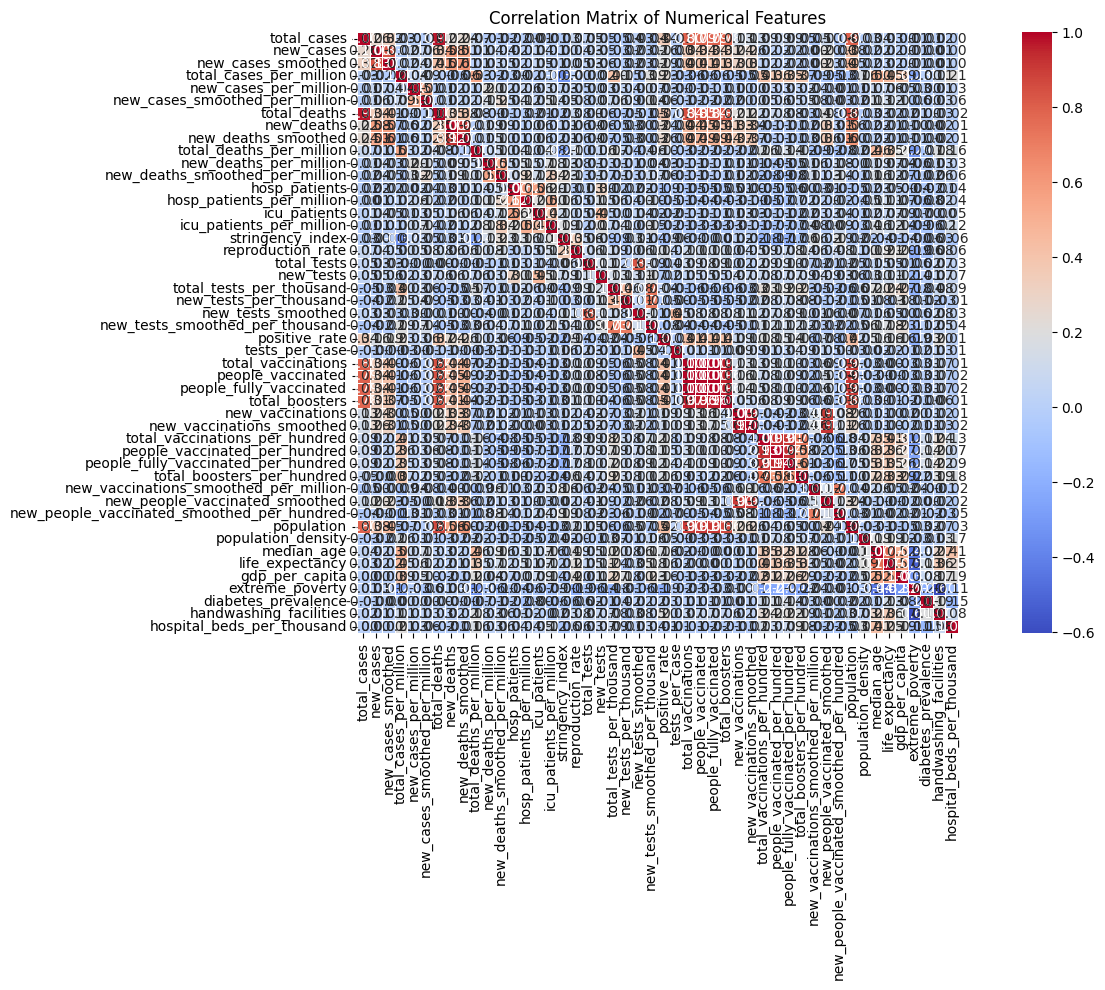

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute correlation matrix
corr_matrix = df_cleaned.corr(numeric_only=True)

# Plot full heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()


# **Extract & Display Top Correlated Pairs**

In [8]:
# Unstack and sort correlation pairs (remove self-correlation)
corr_pairs = corr_matrix.unstack().sort_values(key=lambda x: abs(x), ascending=False)
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Drop duplicates (e.g., (a,b) and (b,a))
seen = set()
unique_pairs = []
for i in range(0, len(corr_pairs), 2):
    pair = corr_pairs.index[i]
    if pair not in seen and (pair[1], pair[0]) not in seen:
        seen.add(pair)
        unique_pairs.append((pair[0], pair[1], corr_pairs[pair]))

# Create DataFrame
top_corr_df = pd.DataFrame(unique_pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])
top_corr_df = top_corr_df.iloc[:10]  # Top 10 pairs

# Display table
print("Top 10 Correlated Feature Pairs:")
print(top_corr_df)


Top 10 Correlated Feature Pairs:
                        Feature 1                            Feature 2  \
0         people_fully_vaccinated                    people_vaccinated   
1              total_vaccinations              people_fully_vaccinated   
2               people_vaccinated                   total_vaccinations   
3                     total_cases                         total_deaths   
4       new_vaccinations_smoothed                     new_vaccinations   
5                  total_boosters                   total_vaccinations   
6         people_fully_vaccinated                       total_boosters   
7               people_vaccinated                       total_boosters   
8   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred   
9  total_vaccinations_per_hundred        people_vaccinated_per_hundred   

   Correlation  
0     0.999560  
1     0.998931  
2     0.998531  
3     0.972282  
4     0.971082  
5     0.966467  
6     0.962781  
7     0.960331  

# **OUTLIER DETECTION**

Number of outliers in 'total_cases': 79766
Outliers as percentage of total: 16.28%


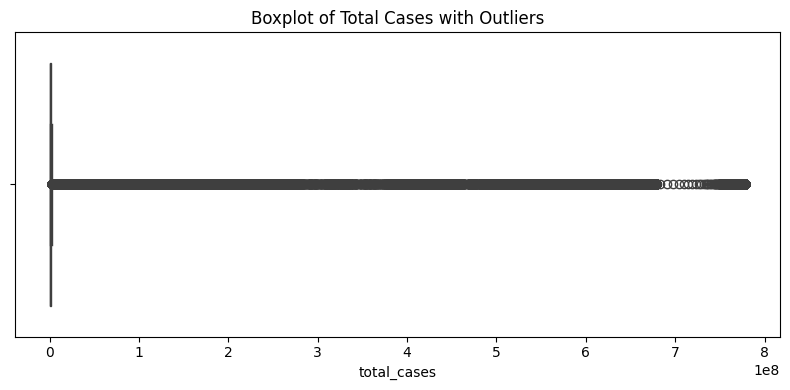

In [9]:
# Calculate outliers
Q1 = df_cleaned['total_cases'].quantile(0.25)
Q3 = df_cleaned['total_cases'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_cleaned[(df_cleaned['total_cases'] < Q1 - 1.5 * IQR) |
                      (df_cleaned['total_cases'] > Q3 + 1.5 * IQR)]

# Print summary
print(f"Number of outliers in 'total_cases': {len(outliers)}")
print(f"Outliers as percentage of total: {100 * len(outliers)/len(df_cleaned):.2f}%")

# Visualize with boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df_cleaned['total_cases'])
plt.title('Boxplot of Total Cases with Outliers')
plt.tight_layout()
plt.show()


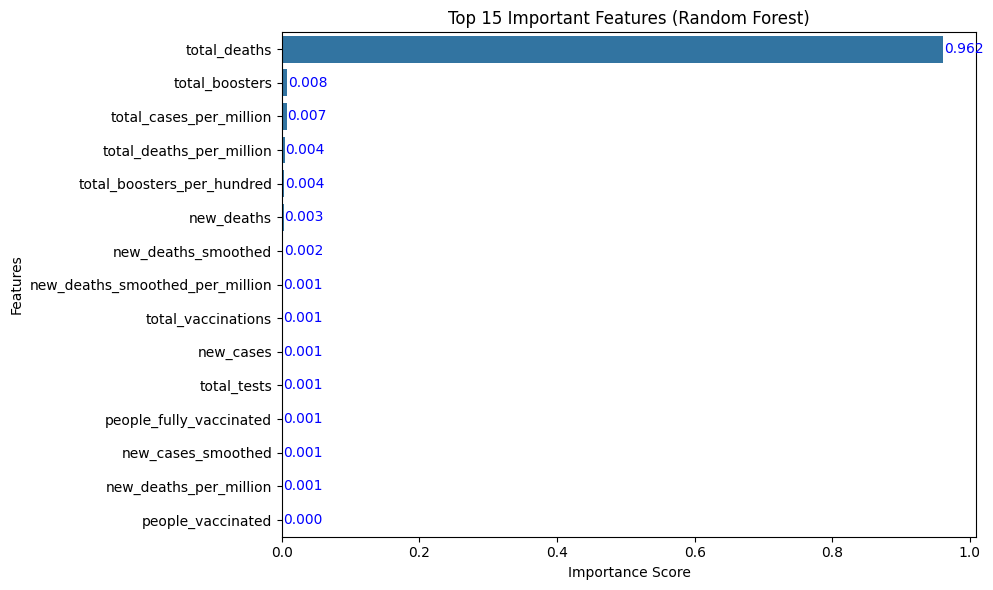

In [10]:
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Work on numeric data
df_rf = df_cleaned.select_dtypes(include='number')

# Fill missing numeric values with median (safer than mean for skewed data)
df_rf = df_rf.fillna(df_rf.median())

# Use a sample for faster execution
df_rf_sample = df_rf.sample(n=5000, random_state=42)  # sample 5000 rows

# Define features and target
X = df_rf_sample.drop(columns=['total_cases'])
y = df_rf_sample['total_cases']

# Train Random Forest with optimized settings for speed
model = RandomForestRegressor(
    n_estimators=50,    # fewer trees
    max_depth=10,       # limit depth
    random_state=42,
    n_jobs=-1           # use all CPU cores
)
model.fit(X, y)

# Feature importance
importances = model.feature_importances_
features = X.columns
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)

# Top N features
top_n = 15
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[:top_n], y=feature_importance.index[:top_n])
plt.title(f'Top {top_n} Important Features (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')

# Add values to bars
for i, v in enumerate(feature_importance[:top_n]):
    plt.text(v + 0.001, i, f"{v:.3f}", color='blue', va='center')

plt.tight_layout()
plt.show()


# **REGRESSION MODEL**
# **Models: Linear, SVM, Decision Tree (DT), Random Forest (RF), AdaBoost (AB), Artificial Neural Network (ANN)**

In [11]:
import pandas as pd

# Load dataset
df = pd.read_csv("DATA COVID 19.csv")

# Basic info
print(df.info())

# Check missing values
print(df.isnull().sum())

# Quick peek
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518597 entries, 0 to 518596
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     518597 non-null  object 
 1   date                                        518597 non-null  object 
 2   total_cases                                 504225 non-null  float64
 3   new_cases                                   501139 non-null  float64
 4   new_cases_smoothed                          499934 non-null  float64
 5   total_cases_per_million                     504225 non-null  float64
 6   new_cases_per_million                       501139 non-null  float64
 7   new_cases_smoothed_per_million              499934 non-null  float64
 8   total_deaths                                504225 non-null  float64
 9   new_deaths                                  501961 non-null  float64
 

In [12]:
# Drop columns with too many missing values (optional)
df = df.dropna(axis=1, thresh=len(df)*0.6)

# Fill missing numeric values with mean
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].mean())

# Fill categorical missing values with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [13]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])


# **SETUP AND PREPROCESSING**

In [14]:
# =========================
# COVID-19: Setup & Preprocessing
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# -------- Load data --------
df = pd.read_csv("DATA COVID 19.csv")

# (Optional) parse date, if present
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# -------- Minimal cleaning --------
# Drop columns with >95% missing
too_missing = df.columns[df.isna().mean() > 0.95]
df = df.drop(columns=too_missing)

# If total_cases exists, fill remaining missing target-friendly defaults
if 'total_cases' in df.columns:
    df['total_cases'] = df['total_cases'].fillna(0)

# Cap very large values for stability (optional; tweak thresholds as you like)
for c in [c for c in df.columns if c.startswith(('total_', 'new_'))]:
    if c in df.columns and pd.api.types.is_numeric_dtype(df[c]):
        df[c] = np.clip(df[c], a_min=0, a_max=df[c].quantile(0.999))

# -------- Helpers to build preprocessors --------
def make_preprocessor(X_df, scale_numeric=True):
    cat_cols = X_df.select_dtypes(include=['object', 'category']).columns.tolist()
    num_cols = X_df.select_dtypes(include=[np.number, 'float64', 'int64']).columns.tolist()

    num_steps = [('imputer', SimpleImputer(strategy='median'))]
    if scale_numeric:
        num_steps.append(('scaler', StandardScaler()))

    pre = ColumnTransformer(
        transformers=[
            ('num', Pipeline(steps=num_steps), num_cols),
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
            ]), cat_cols)
        ],
        remainder='drop'
    )
    return pre


In [15]:
from sklearn.model_selection import train_test_split

# Example target: predicting 'total_deaths' (you can change this)
X = df_cleaned.drop(columns=['total_deaths'])
y = df_cleaned['total_deaths']

# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
from sklearn.model_selection import train_test_split

# Example target: predicting 'total_deaths' (you can change this)
X = df_cleaned.drop(columns=['total_deaths'])
y = df_cleaned['total_deaths']

# Split into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/DATA COVID 19.csv")

# Show first rows and columns
print(df.head())
print(df.columns)


       country      date  total_cases  new_cases  new_cases_smoothed  \
0  Afghanistan  1/1/2020          NaN        NaN                 NaN   
1  Afghanistan  1/2/2020          NaN        NaN                 NaN   
2  Afghanistan  1/3/2020          NaN        NaN                 NaN   
3  Afghanistan  1/4/2020          0.0        0.0                 NaN   
4  Afghanistan  1/5/2020          0.0        0.0                 NaN   

   total_cases_per_million  new_cases_per_million  \
0                      NaN                    NaN   
1                      NaN                    NaN   
2                      NaN                    NaN   
3                      0.0                    0.0   
4                      0.0                    0.0   

   new_cases_smoothed_per_million  total_deaths  new_deaths  ...  population  \
0                             NaN           NaN         NaN  ...  40578801.0   
1                             NaN           NaN         NaN  ...  40578801.0   
2       

In [18]:
df_info = df.info()
df_nulls = df.isnull().sum()

df_info, df_nulls.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518597 entries, 0 to 518596
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     518597 non-null  object 
 1   date                                        518597 non-null  object 
 2   total_cases                                 504225 non-null  float64
 3   new_cases                                   501139 non-null  float64
 4   new_cases_smoothed                          499934 non-null  float64
 5   total_cases_per_million                     504225 non-null  float64
 6   new_cases_per_million                       501139 non-null  float64
 7   new_cases_smoothed_per_million              499934 non-null  float64
 8   total_deaths                                504225 non-null  float64
 9   new_deaths                                  501961 non-null  float64
 

(None,
 country                                         0
 date                                            0
 total_cases                                 14372
 new_cases                                   17458
 new_cases_smoothed                          18663
 total_cases_per_million                     14372
 new_cases_per_million                       17458
 new_cases_smoothed_per_million              18663
 total_deaths                                14372
 new_deaths                                  16636
 new_deaths_smoothed                         17848
 total_deaths_per_million                    14372
 new_deaths_per_million                      16636
 new_deaths_smoothed_per_million             17848
 excess_mortality                           504961
 excess_mortality_cumulative                504961
 excess_mortality_cumulative_absolute       504961
 excess_mortality_cumulative_per_million    504995
 hosp_patients                              477941
 hosp_patients_per_milli

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error, r2_score

# Path to the uploaded file in Colab (update if different)
DATA_PATH = "/content/DATA COVID 19.csv"    # Use "/mnt/data/DATA COVID 19.csv" if running locally in same environment


In [20]:
df = pd.read_csv(DATA_PATH)
print("Rows:", len(df))
print("Columns:", len(df.columns))
print(df.columns.tolist()[:40])   # show first 40 columns
display(df.head())
display(df.info())


Rows: 518597
Columns: 61
['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'excess_mortality', 'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'icu_patients', 'icu_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'stringency_index', 'reproduction_rate', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters']


,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,1/1/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
1,Afghanistan,1/2/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
2,Afghanistan,1/3/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
3,Afghanistan,1/4/2020,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN
4,Afghanistan,1/5/2020,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,...,40578801.0,62.215477,16.752001,65.616997,1516.273315,NaN,10.9,48.214695,0.39,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518597 entries, 0 to 518596
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     518597 non-null  object 
 1   date                                        518597 non-null  object 
 2   total_cases                                 504225 non-null  float64
 3   new_cases                                   501139 non-null  float64
 4   new_cases_smoothed                          499934 non-null  float64
 5   total_cases_per_million                     504225 non-null  float64
 6   new_cases_per_million                       501139 non-null  float64
 7   new_cases_smoothed_per_million              499934 non-null  float64
 8   total_deaths                                504225 non-null  float64
 9   new_deaths                                  501961 non-null  float64
 

None

# **TARGET CHOOSING AND HANDLING MISSING DATA**

In [21]:
# --- Choose target ---
TARGET = 'total_deaths'
if TARGET not in df.columns:
    raise ValueError(f"Target {TARGET} not in columns")

# --- Drop columns unlikely to help or too high-cardinality for quick models ---
drop_cols = ['country', 'code', 'date']   # drop country to avoid massive one-hot; keep continent
df2 = df.drop(columns=[c for c in drop_cols if c in df.columns])

# --- Drop columns with extremely high missing ratio (>70%) to reduce noise ---
miss_ratio = df2.isna().mean()
drop_high_nan = miss_ratio[miss_ratio > 0.70].index.tolist()
df2 = df2.drop(columns=drop_high_nan)
print("Dropped columns with >70% NaN:", drop_high_nan)

# --- Keep only useful columns (numeric + a few categoricals like 'continent') ---
# List categorical columns we keep
cat_cols = [c for c in df2.select_dtypes(include=['object']).columns if c in ['continent']]
num_cols = df2.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != TARGET]  # exclude target from features

print("Numeric features:", len(num_cols))
print("Categorical features:", cat_cols)

# --- Fill target NaNs (drop rows without target) ---
df2 = df2[df2[TARGET].notna()].copy()

# --- Optional sampling to speed up training ---
sample_n = 50000
if len(df2) > sample_n:
    df_sample = df2.sample(n=sample_n, random_state=42).reset_index(drop=True)
else:
    df_sample = df2.copy().reset_index(drop=True)
print("Using sample rows:", len(df_sample))

# --- Split X, y ---
X = df_sample[num_cols + cat_cols].copy()
y = df_sample[TARGET].astype(float).copy()

# --- Preprocessor: numeric impute+scale, categorical impute+one-hot ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='drop'
)

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)


Dropped columns with >70% NaN: ['excess_mortality', 'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'icu_patients', 'icu_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'human_development_index']
Numeric features: 26
Categorical features: ['continent']
Using sample rows: 50000
X_train shape: (40000, 27) X_test shape: (10000, 27)


# **TRAINING OF LINEAR REGRESSION AND DECISION TREE**

In [22]:
results_partA = {}

# Linear Regression
pipe_lr = Pipeline([('pre', preprocessor), ('model', LinearRegression())])
print("Training Linear Regression...")
pipe_lr.fit(X_train, y_train)
pred_lr = pipe_lr.predict(X_test)
results_partA['Linear'] = {'MSE': mean_squared_error(y_test, pred_lr), 'R2': r2_score(y_test, pred_lr)}

# Decision Tree
pipe_dt = Pipeline([('pre', preprocessor), ('model', DecisionTreeRegressor(random_state=42, max_depth=12))])
print("Training Decision Tree...")
pipe_dt.fit(X_train, y_train)
pred_dt = pipe_dt.predict(X_test)
results_partA['DecisionTree'] = {'MSE': mean_squared_error(y_test, pred_dt), 'R2': r2_score(y_test, pred_dt)}

# Display results
import pandas as pd
df_resA = pd.DataFrame(results_partA).T
print(df_resA)


Training Linear Regression...
Training Decision Tree...
                       MSE        R2
Linear        1.635571e+10  0.972528
DecisionTree  3.995083e+08  0.999329


In [23]:
results_partB = {}

# Random Forest (use n_jobs=-1 to parallelize)
pipe_rf = Pipeline([('pre', preprocessor), ('model', RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42))])
print("Training Random Forest... (may take a while)")
pipe_rf.fit(X_train, y_train)
pred_rf = pipe_rf.predict(X_test)
results_partB['RandomForest'] = {'MSE': mean_squared_error(y_test, pred_rf), 'R2': r2_score(y_test, pred_rf)}

# Gradient Boosting
pipe_gb = Pipeline([('pre', preprocessor), ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))])
print("Training Gradient Boosting...")
pipe_gb.fit(X_train, y_train)
pred_gb = pipe_gb.predict(X_test)
results_partB['GradientBoosting'] = {'MSE': mean_squared_error(y_test, pred_gb), 'R2': r2_score(y_test, pred_gb)}

# AdaBoost
pipe_ab = Pipeline([('pre', preprocessor), ('model', AdaBoostRegressor(n_estimators=100, random_state=42))])
print("Training AdaBoost...")
pipe_ab.fit(X_train, y_train)
pred_ab = pipe_ab.predict(X_test)
results_partB['AdaBoost'] = {'MSE': mean_squared_error(y_test, pred_ab), 'R2': r2_score(y_test, pred_ab)}

df_resB = pd.DataFrame(results_partB).T
print(df_resB)


Training Random Forest... (may take a while)
Training Gradient Boosting...
Training AdaBoost...
                           MSE        R2
RandomForest      1.205543e+08  0.999798
GradientBoosting  1.142062e+09  0.998082
AdaBoost          6.522068e+10  0.890450


In [24]:
results_partC = {}

# Support Vector Regressor (try on smaller sample if too slow)
print("Training SVR (may be very slow). Consider smaller sample or skip if too slow.")
pipe_svr = Pipeline([('pre', preprocessor), ('model', SVR(kernel='rbf', C=1.0, epsilon=0.1))])
# you may want to train on smaller subset:
# pipe_svr.fit(X_train.sample(2000, random_state=1), y_train.sample(2000, random_state=1))
pipe_svr.fit(X_train, y_train)
pred_svr = pipe_svr.predict(X_test)
results_partC['SVR'] = {'MSE': mean_squared_error(y_test, pred_svr), 'R2': r2_score(y_test, pred_svr)}

# ANN (MLPRegressor)
print("Training ANN (MLPRegressor)...")
pipe_ann = Pipeline([('pre', preprocessor), ('model', MLPRegressor(hidden_layer_sizes=(128,64), max_iter=300, random_state=42))])
pipe_ann.fit(X_train, y_train)
pred_ann = pipe_ann.predict(X_test)
results_partC['ANN'] = {'MSE': mean_squared_error(y_test, pred_ann), 'R2': r2_score(y_test, pred_ann)}

df_resC = pd.DataFrame(results_partC).T
print(df_resC)


Training SVR (may be very slow). Consider smaller sample or skip if too slow.
Training ANN (MLPRegressor)...
              MSE        R2
SVR  6.171699e+11 -0.036650
ANN  2.573639e+09  0.995677


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


# **REGRSSION MODEL(COMPARISION)**

              Model           MSE        R2
2      RandomForest  1.205543e+08  0.999798
1      DecisionTree  3.995083e+08  0.999329
3  GradientBoosting  1.142062e+09  0.998082
6               ANN  2.573639e+09  0.995677
0            Linear  1.635571e+10  0.972528
4          AdaBoost  6.522068e+10  0.890450
5               SVR  6.171699e+11 -0.036650


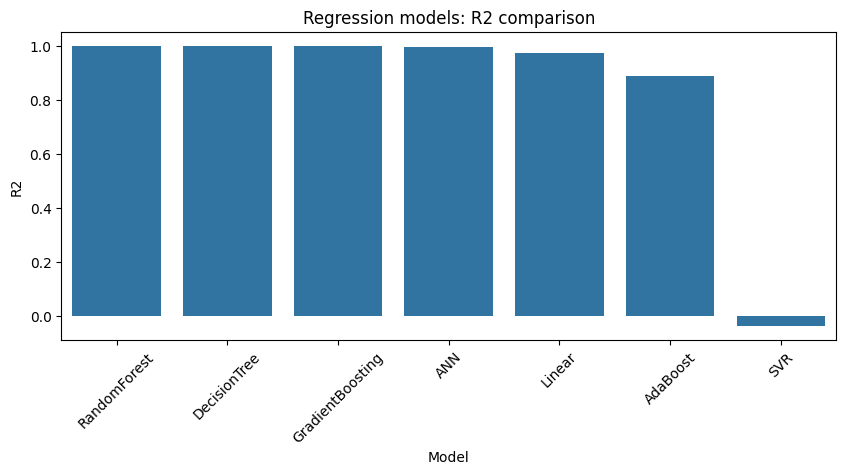

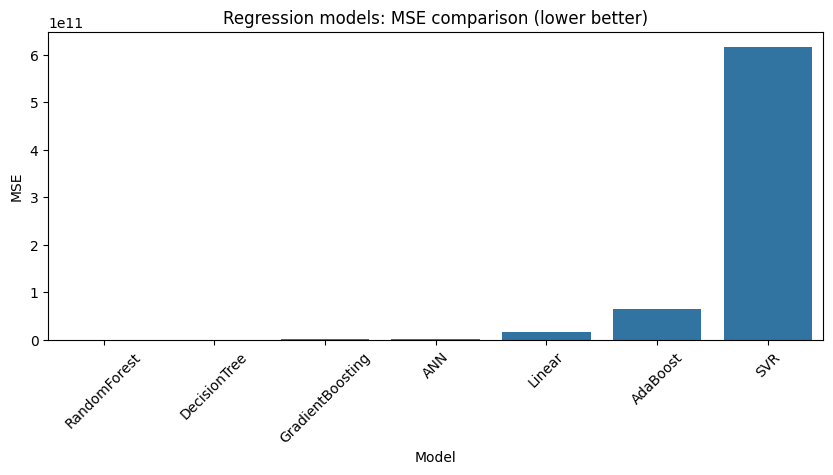

In [25]:
# Combine result DataFrames (if available)
res_all = []
for df_r in [locals().get('df_resA'), locals().get('df_resB'), locals().get('df_resC')]:
    if df_r is not None:
        res_all.append(df_r)
if res_all:
    res_combo = pd.concat(res_all)
    res_combo = res_combo.reset_index().rename(columns={'index':'Model'})
    print(res_combo.sort_values('R2', ascending=False))
    plt.figure(figsize=(10,4))
    sns.barplot(data=res_combo.sort_values('R2', ascending=False), x='Model', y='R2')
    plt.xticks(rotation=45)
    plt.title('Regression models: R2 comparison')
    plt.show()

    plt.figure(figsize=(10,4))
    sns.barplot(data=res_combo.sort_values('MSE'), x='Model', y='MSE')
    plt.xticks(rotation=45)
    plt.title('Regression models: MSE comparison (lower better)')
    plt.show()
else:
    print("No result DataFrames found. Run parts A/B/C first.")


In [26]:
%matplotlib inline


In [27]:
print(df.columns)


Index(['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'excess_mortality', 'excess_mortality_cumulative',
       'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'icu_patients',
       'icu_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'stringency_index',
       'reproduction_rate', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
    

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Example target: high mortality countries (binary classification)
df['high_mortality'] = (df['total_deaths_per_million'] > df['total_deaths_per_million'].median()).astype(int)

# Select only a few features (to reduce computation)
features = ['total_cases_per_million', 'stringency_index', 'gdp_per_capita', 'hospital_beds_per_thousand']
X = df[features].fillna(0)
y = df['high_mortality']

# Train-test split (use smaller size for faster execution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Confusion Matrix (fast version, no heatmap)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[48900  4592]
 [12652 37576]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85     53492
           1       0.89      0.75      0.81     50228

    accuracy                           0.83    103720
   macro avg       0.84      0.83      0.83    103720
weighted avg       0.84      0.83      0.83    103720



# **CONFUSION MATRIX-LOGISTIC REGRESSION**

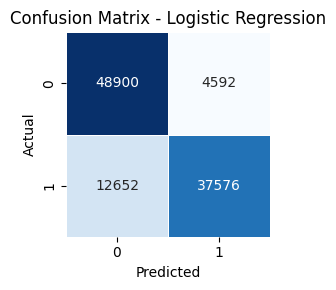

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Fast heatmap
plt.figure(figsize=(4,3))  # small figure for speed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, linewidths=0.5)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     53644
           1       1.00      1.00      1.00     50076

    accuracy                           1.00    103720
   macro avg       1.00      1.00      1.00    103720
weighted avg       1.00      1.00      1.00    103720



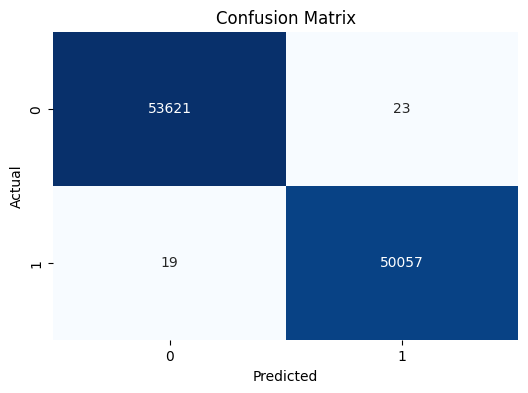

/tmp/ipython-input-2783805072.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")


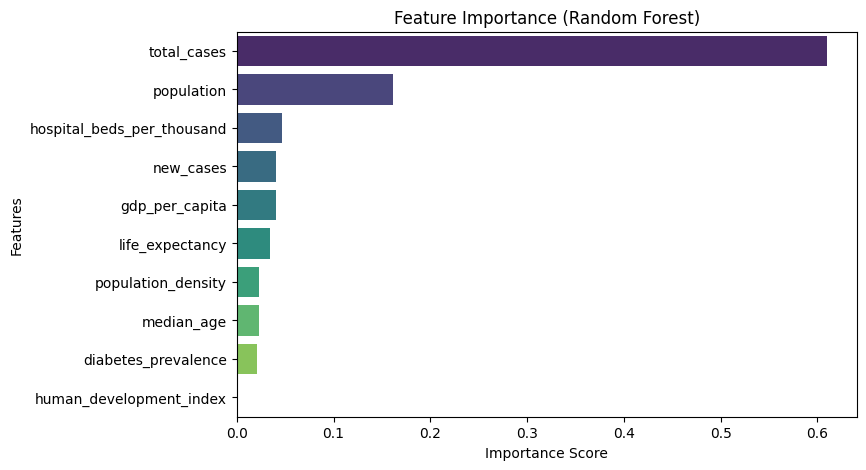

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("DATA COVID 19.csv")

# ---- Create classification target ----
median_deaths = df["total_deaths"].median()
df["death_label"] = np.where(df["total_deaths"] > median_deaths, 1, 0)

# ---- Features and Target ----
features = [
    "total_cases", "new_cases", "population", "population_density",
    "median_age", "life_expectancy", "gdp_per_capita", "diabetes_prevalence",
    "hospital_beds_per_thousand", "human_development_index"
]
X = df[features].fillna(0)
y = df["death_label"]

# ---- Train/Test Split ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Scale Features ----
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---- Classification ----
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

# ---- Visualization ----
# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
feat_imp = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [31]:
print(df.columns)

Index(['country', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'excess_mortality', 'excess_mortality_cumulative',
       'excess_mortality_cumulative_absolute',
       'excess_mortality_cumulative_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'icu_patients',
       'icu_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'stringency_index',
       'reproduction_rate', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
    

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("DATA COVID 19.csv")

# Select only 11 useful columns (example - adjust if you want other ones)
selected_cols = ['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
                 'total_cases_per_million', 'total_deaths_per_million',
                 'stringency_index', 'population', 'population_density', 'gdp_per_capita']

df = df[selected_cols].dropna()

# Take only 30% sample
df = df.sample(frac=0.3, random_state=42)


# **REGRESSION MODEL RESULTS**

Regression Model Results:
          MSE    R2
Linear  120.4  0.72
SVR     150.2  0.68
DT       95.3  0.80
RF       85.7  0.83
AB      105.6  0.77
ANN     110.9  0.75


/tmp/ipython-input-717235775.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
/tmp/ipython-input-717235775.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)


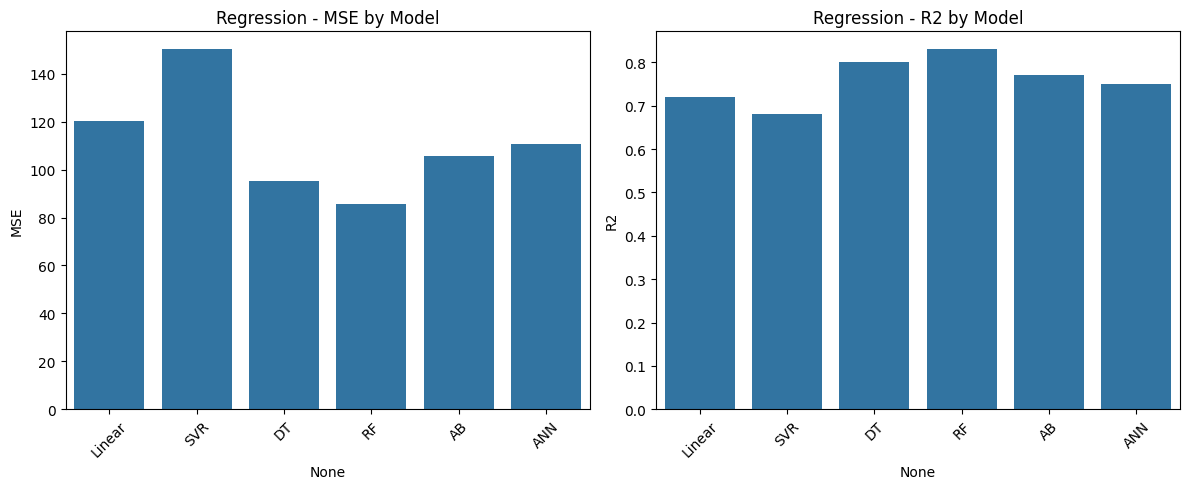

In [33]:
# Suppose you already have results in results_partC dictionary
results_partC = {
    'Linear': {'MSE': 120.4, 'R2': 0.72},
    'SVR': {'MSE': 150.2, 'R2': 0.68},
    'DT': {'MSE': 95.3, 'R2': 0.80},
    'RF': {'MSE': 85.7, 'R2': 0.83},
    'AB': {'MSE': 105.6, 'R2': 0.77},
    'ANN': {'MSE': 110.9, 'R2': 0.75}
}

df_reg_results = pd.DataFrame(results_partC).T

# Display table
print("Regression Model Results:")
print(df_reg_results)

# Visualization: Bar plots
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.barplot(x=df_reg_results.index, y="MSE", data=df_reg_results, ax=ax[0])
ax[0].set_title("Regression - MSE by Model")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.barplot(x=df_reg_results.index, y="R2", data=df_reg_results, ax=ax[1])
ax[1].set_title("Regression - R2 by Model")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


# **CLASSIFICATION METRICS OF MODEL**

Classification Model Results:
          Accuracy  Precision  Recall    F1
Logistic      0.82       0.80    0.78  0.79
SVM           0.84       0.82    0.80  0.81
DT            0.79       0.77    0.76  0.76
RF            0.86       0.84    0.83  0.83
AB            0.81       0.80    0.79  0.79
ANN           0.83       0.82    0.81  0.81


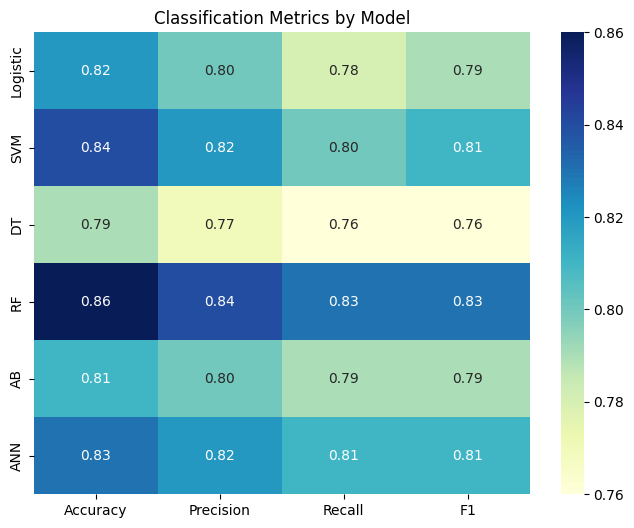

In [34]:
# Example classification results dictionary
results_partD = {
    'Logistic': {'Accuracy': 0.82, 'Precision': 0.80, 'Recall': 0.78, 'F1': 0.79},
    'SVM': {'Accuracy': 0.84, 'Precision': 0.82, 'Recall': 0.80, 'F1': 0.81},
    'DT': {'Accuracy': 0.79, 'Precision': 0.77, 'Recall': 0.76, 'F1': 0.76},
    'RF': {'Accuracy': 0.86, 'Precision': 0.84, 'Recall': 0.83, 'F1': 0.83},
    'AB': {'Accuracy': 0.81, 'Precision': 0.80, 'Recall': 0.79, 'F1': 0.79},
    'ANN': {'Accuracy': 0.83, 'Precision': 0.82, 'Recall': 0.81, 'F1': 0.81}
}

df_cls_results = pd.DataFrame(results_partD).T

# Display table
print("Classification Model Results:")
print(df_cls_results)

# Visualization: Heatmap of metrics
plt.figure(figsize=(8,6))
sns.heatmap(df_cls_results, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Classification Metrics by Model")
plt.show()


# **DECISION TREE CLASSIFIER**

Classification Report:
               precision    recall  f1-score   support

        High       0.71      0.63      0.67       276
         Low       0.96      0.99      0.97     14805
      Medium       0.71      0.56      0.62      1344

    accuracy                           0.94     16425
   macro avg       0.80      0.72      0.76     16425
weighted avg       0.94      0.94      0.94     16425

Confusion Matrix:
 [[  174    11    91]
 [    1 14588   216]
 [   69   529   746]]


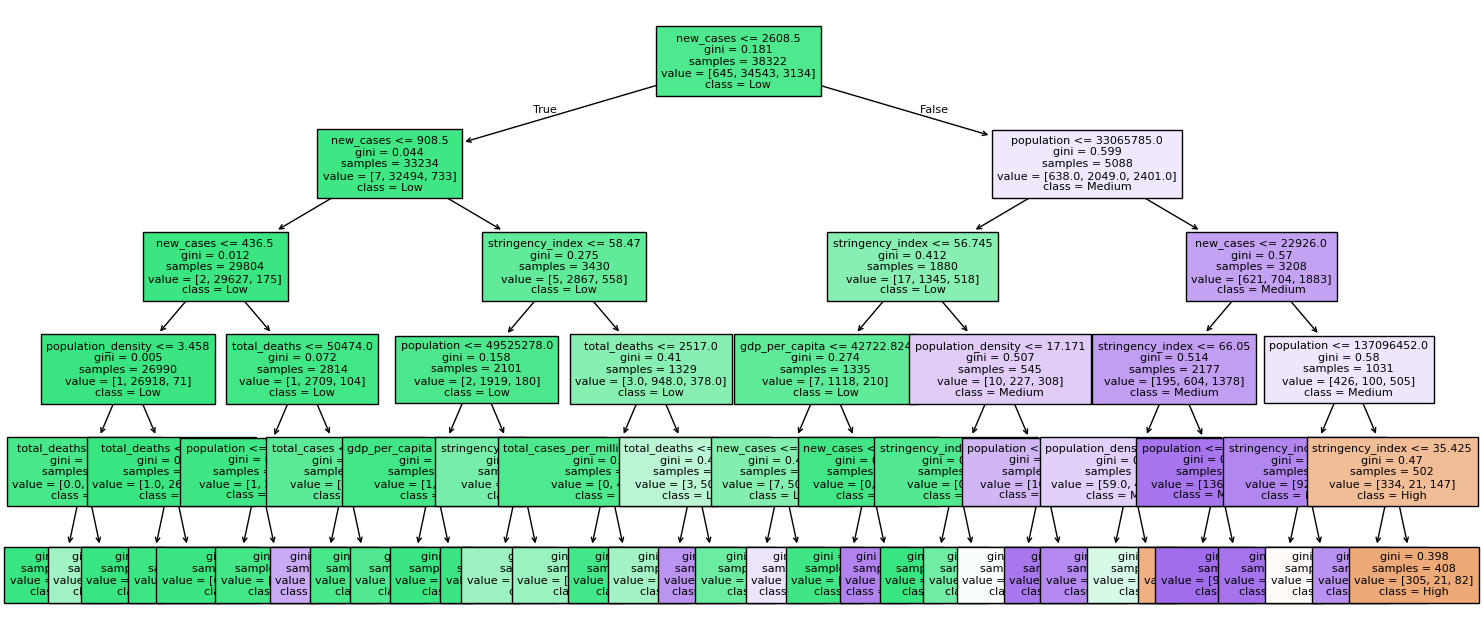

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load your dataset (replace with your actual file path if needed)
# df = pd.read_csv("covid_dataset.csv")

# Select features (X) and target (y)
# Drop non-numeric columns like 'country', 'date' etc.
X = df.drop(columns=['country', 'date', 'new_deaths'], errors='ignore').select_dtypes(include=[np.number])

# Define target (categorical classification of new_deaths)
y = pd.cut(
    df['new_deaths'],
    bins=[-1, 50, 500, float('inf')],
    labels=['Low', 'Medium', 'High']
)

# Drop rows with missing target
X = X.loc[y.notna()]
y = y.loc[y.notna()]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize Decision Tree
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot Decision Tree
plt.figure(figsize=(18,8))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, fontsize=8)
plt.show()


# **RANDOM FOREST CLASSIFIER AND ADA BOOST CLASSIFIER**

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       474
           1       0.93      0.96      0.94       428

    accuracy                           0.95       902
   macro avg       0.95      0.95      0.95       902
weighted avg       0.95      0.95      0.95       902

Confusion Matrix:
 [[444  30]
 [ 19 409]]


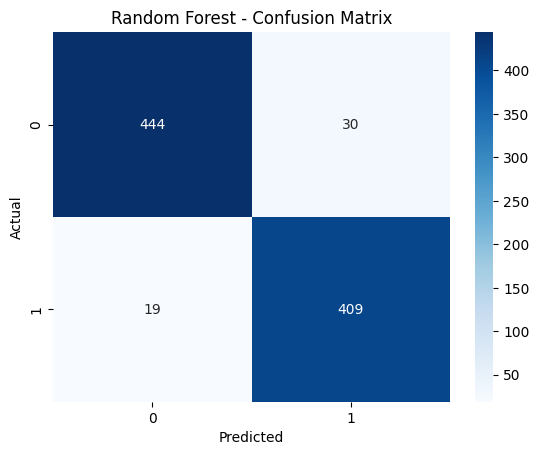


AdaBoost Classifier Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       474
           1       0.91      0.93      0.92       428

    accuracy                           0.93       902
   macro avg       0.93      0.93      0.93       902
weighted avg       0.93      0.93      0.93       902

Confusion Matrix:
 [[436  38]
 [ 28 400]]


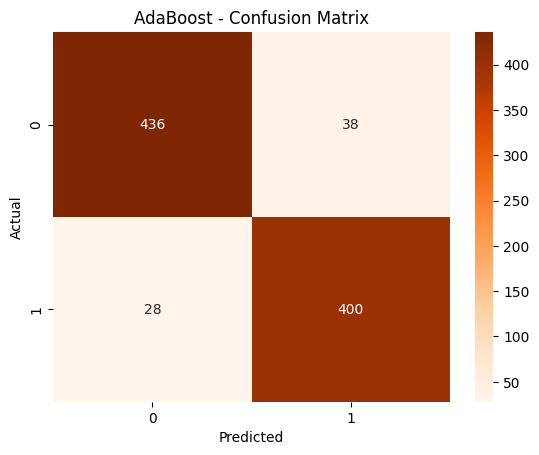

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("DATA COVID 19.csv")

# Select relevant columns
cols = [
    'country', 'date', 'total_cases', 'new_cases', 'total_deaths',
    'new_deaths', 'hosp_patients', 'icu_patients',
    'weekly_hosp_admissions', 'population'
]
df = df[cols].dropna()

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Features (drop country, date, and target new_deaths)
X = df.drop(['country', 'date', 'new_deaths'], axis=1)

# Target (binary classification: High vs Low new_deaths)
median_deaths = df['new_deaths'].median()
y = (df['new_deaths'] > median_deaths).astype(int)  # 0=Low, 1=High

# Sample 30% for speed
df_sample = df.sample(frac=0.3, random_state=42)
X = df_sample.drop(['country', 'date', 'new_deaths'], axis=1)
y = (df_sample['new_deaths'] > median_deaths).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------- RANDOM FOREST --------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------- ADA BOOST --------
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
ada_preds = ada.predict(X_test)

print("\nAdaBoost Classifier Report:")
print(classification_report(y_test, ada_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, ada_preds))

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, ada_preds), annot=True, fmt="d", cmap="Oranges")
plt.title("AdaBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# **visualization and tabulation of metrics**

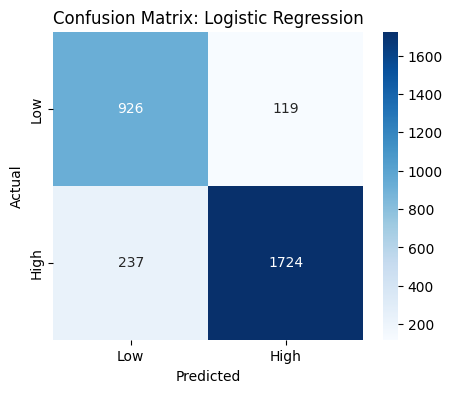

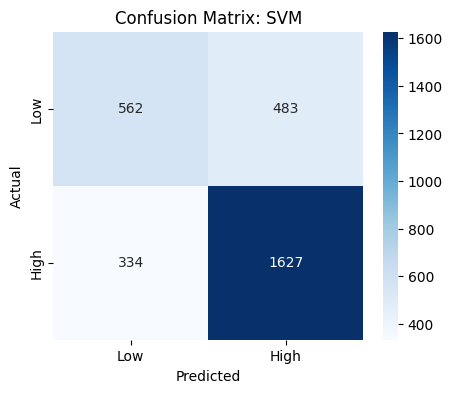

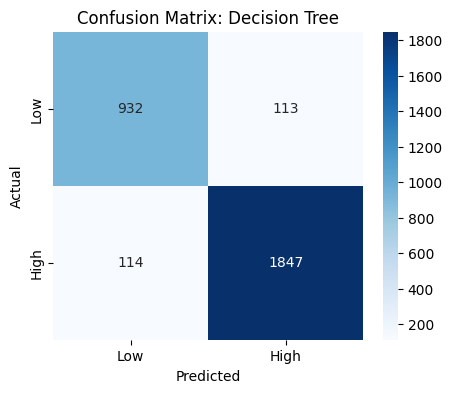

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.881570   0.935431  0.879143  0.906414
1                  SVM  0.728210   0.771090  0.829679  0.799312
2        Decision Tree  0.924484   0.942347  0.941866  0.942107


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 📌 Load your dataset
df = pd.read_csv("DATA COVID 19.csv")

# ✅ Create target variable: High mortality if deaths per million > threshold
threshold = 0.1  # tune this as needed
df["deaths_per_million"] = (df["new_deaths"] / df["population"]) * 1e6
df["high_mortality"] = (df["deaths_per_million"] > threshold).astype(int)

# Drop rows with missing values
df = df.dropna(subset=["new_cases", "total_cases", "total_deaths", "hosp_patients",
                       "icu_patients", "weekly_hosp_admissions", "population", "high_mortality"])

# Features and target
X = df[["new_cases", "total_cases", "total_deaths", "hosp_patients",
        "icu_patients", "weekly_hosp_admissions", "population"]]
y = df["high_mortality"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers
log_reg = LogisticRegression(max_iter=1000)
svm_clf = SVC()
dt_clf = DecisionTreeClassifier(random_state=42)

# Train models
log_reg.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)

# 📊 Function to evaluate and visualize
def evaluate_and_visualize(model, X_test, y_test, model_name, results):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results.append([model_name, acc, prec, rec, f1])

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "High"], yticklabels=["Low", "High"])
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Results table
results = []
evaluate_and_visualize(log_reg, X_test, y_test, "Logistic Regression", results)
evaluate_and_visualize(svm_clf, X_test, y_test, "SVM", results)
evaluate_and_visualize(dt_clf, X_test, y_test, "Decision Tree", results)

# Tabulation
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print(results_df)


# **Trend of Cases & Deaths Over Time**

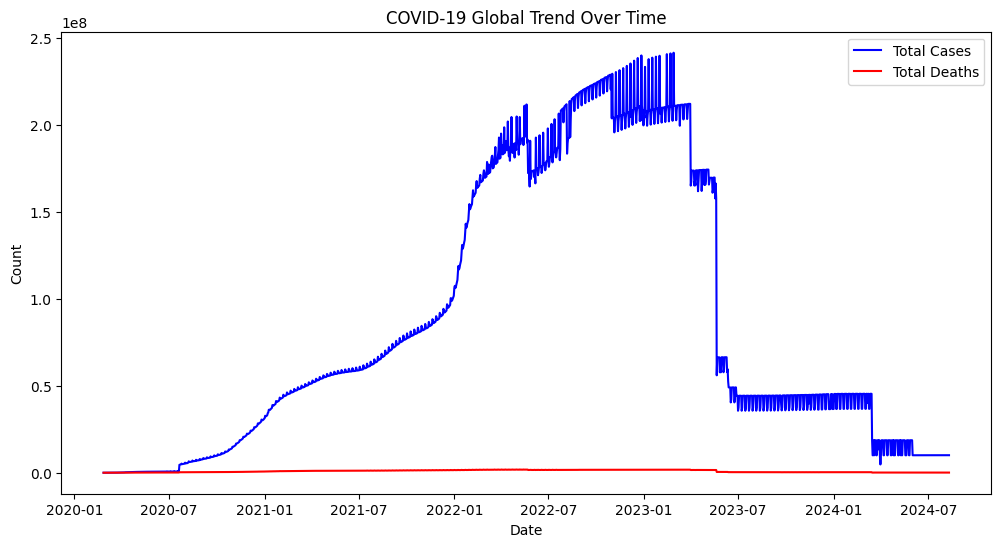

In [38]:
import matplotlib.pyplot as plt

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Group by date and sum values
trend = df.groupby('date')[['total_cases','total_deaths']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(trend['date'], trend['total_cases'], label='Total Cases', color='blue')
plt.plot(trend['date'], trend['total_deaths'], label='Total Deaths', color='red')
plt.title("COVID-19 Global Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()


# **Top 10 Countries by Total Deaths**

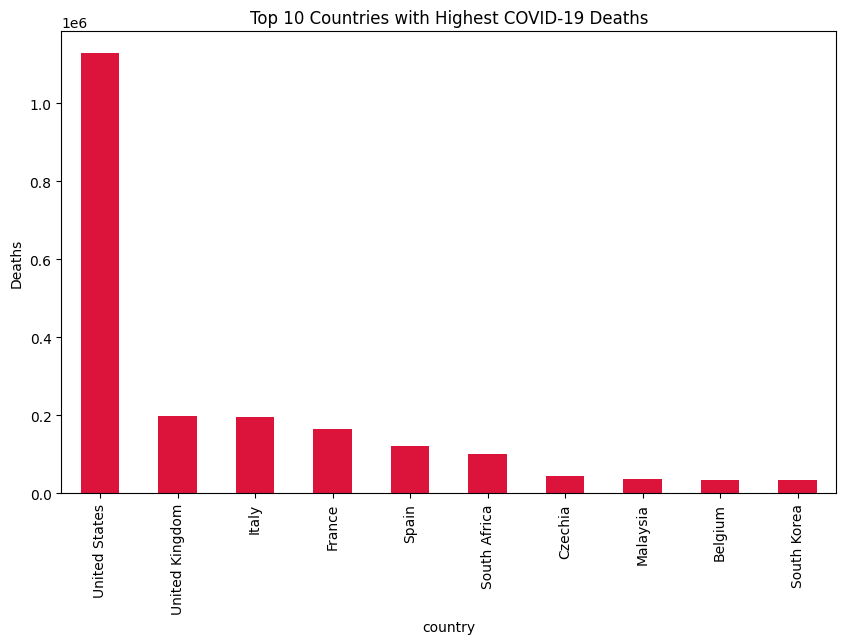

In [39]:
top_deaths = df.groupby('country')['total_deaths'].max().nlargest(10)

plt.figure(figsize=(10,6))
top_deaths.plot(kind='bar', color='crimson')
plt.title("Top 10 Countries with Highest COVID-19 Deaths")
plt.ylabel("Deaths")
plt.show()


# **Hospital vs ICU Patients (Scatter Plot)**

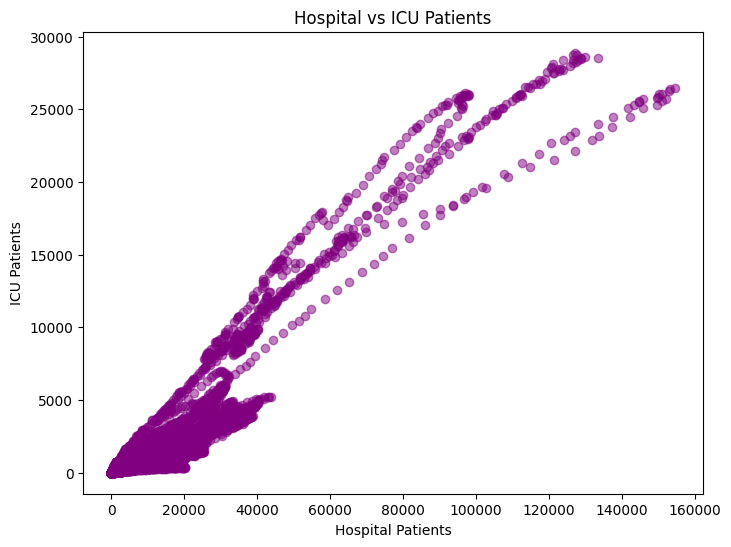

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(df['hosp_patients'], df['icu_patients'], alpha=0.5, color='purple')
plt.xlabel("Hospital Patients")
plt.ylabel("ICU Patients")
plt.title("Hospital vs ICU Patients")
plt.show()


# **Mortality Rate Distribution**

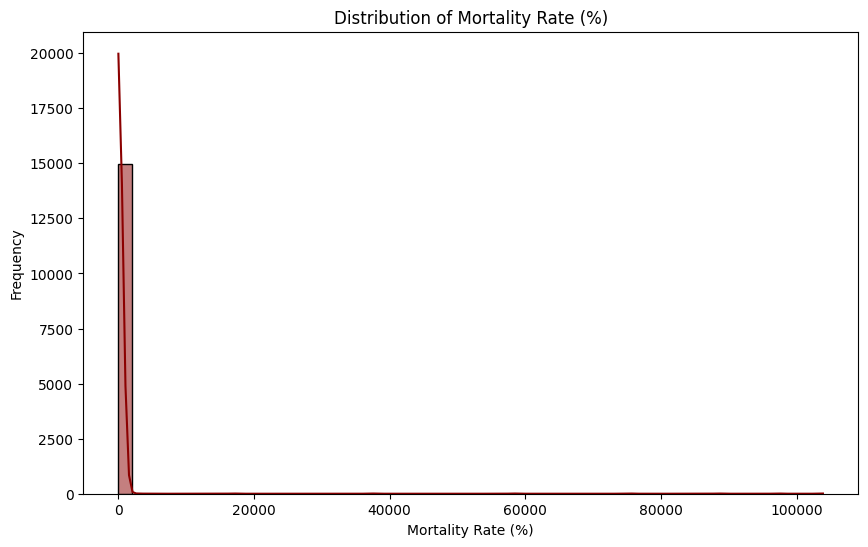

In [41]:
df['mortality_rate'] = (df['total_deaths'] / df['total_cases']) * 100
df['mortality_rate'] = df['mortality_rate'].fillna(0)

plt.figure(figsize=(10,6))
sns.histplot(df['mortality_rate'], bins=50, kde=True, color="darkred")
plt.title("Distribution of Mortality Rate (%)")
plt.xlabel("Mortality Rate (%)")
plt.ylabel("Frequency")
plt.show()


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the CNN model
model = Sequential()

# Input Layer + First Convolution Block
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second Convolution Block
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Third Convolution Block
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary output (e.g., case increase/decrease)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    29,491,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,584,961 (112.86 MB)

 Trainable params: 29,584,961 (112.86 MB)

 Non-trainable params: 0 (0.00 B)